# PyTorch benchmark analysis

Single node throughput comparisons between installation versions

In [1]:
import os
import re

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def parse_log(log_file):
    train_pattern = re.compile('.*Train samples (\S+) time (\S+) s rate (\S+).*')
    valid_pattern = re.compile('.*Valid samples (\S+) time (\S+) s rate (\S+).*')
    results = {}
    with open(log_file) as f:
        for l in f:
            m = train_pattern.match(l)
            if m:
                results['train_samples'] = int(m.group(1))
                results['train_time'] = float(m.group(2))
                results['train_rate'] = float(m.group(3))
            m = valid_pattern.match(l)
            if m:
                results['valid_samples'] = int(m.group(1))
                results['valid_time'] = float(m.group(2))
                results['valid_rate'] = float(m.group(3))
    return results

In [4]:
benchmark_dir = os.path.expandvars('$SCRATCH/pytorch-benchmarks')
versions = ['v0.4.0', 'v0.4.1', 'v1.0', 'v1.0-intel']

In [4]:
results = []
for version in versions:
    models = os.listdir(os.path.join(benchmark_dir, version))
    for model in models:
        log_file = os.path.join(benchmark_dir, version, model, 'out.log')
        result = parse_log(log_file)
        result.update(version=version, model=model)
        results.append(result)
results = pd.DataFrame(results)

In [6]:
results

,model,train_rate,train_samples,train_time,valid_rate,valid_samples,valid_time,version
0,inceptionV3,7.01161,1024,146.04400,48.9662,1024,20.912400,v0.4.0
1,lstm,235.36800,1024,4.35063,371.7730,1024,2.754370,v0.4.0
2,alexnet,113.04000,1024,9.05874,366.1020,1024,2.797040,v0.4.0
3,resnet50,5.66962,1024,180.61200,24.6849,1024,41.482800,v0.4.0
4,vgg11,8.69824,1024,117.72500,27.4347,1024,37.325000,v0.4.0
5,cnn3d,37.33680,1024,27.42600,84.3882,1024,12.134400,v0.4.0
6,inceptionV3,5.62499,1024,182.04500,23.0687,1024,44.389200,v0.4.1
7,lstm,607.80300,1024,1.68476,2099.5800,1024,0.487718,v0.4.1
8,alexnet,107.35900,1024,9.53808,372.2500,1024,2.750840,v0.4.1
9,resnet50,5.15687,1024,198.57000,23.8690,1024,42.900800,v0.4.1


## Training throughput comparisons

In [7]:
models = results.model.unique()

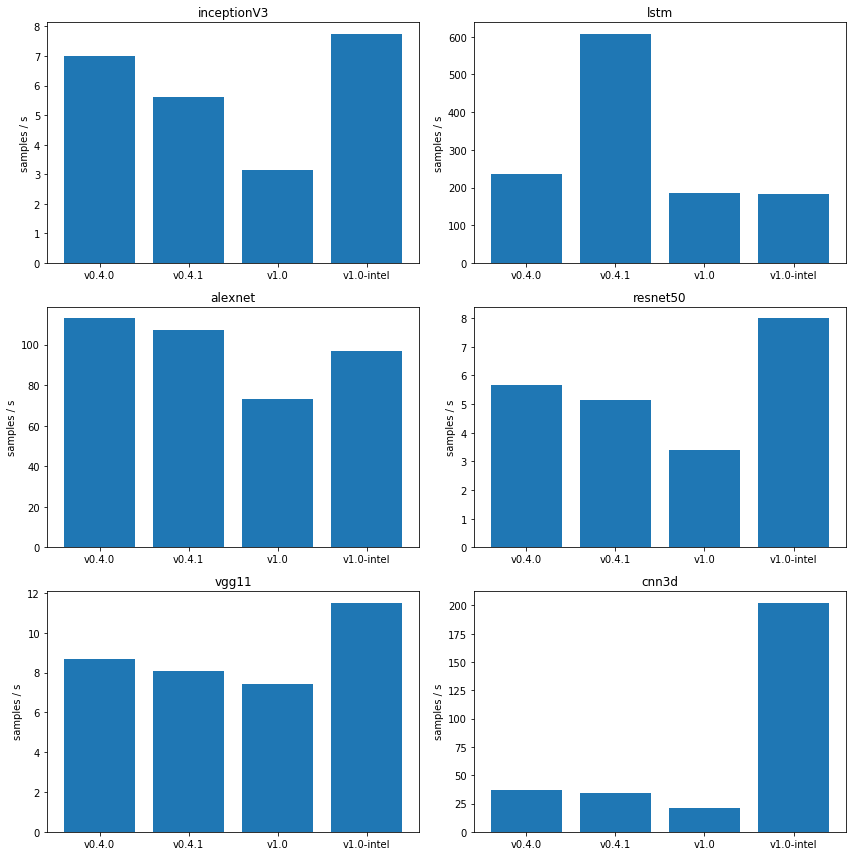

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model]
    ax.bar(model_results.version, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()

## Inference throughput comparisons

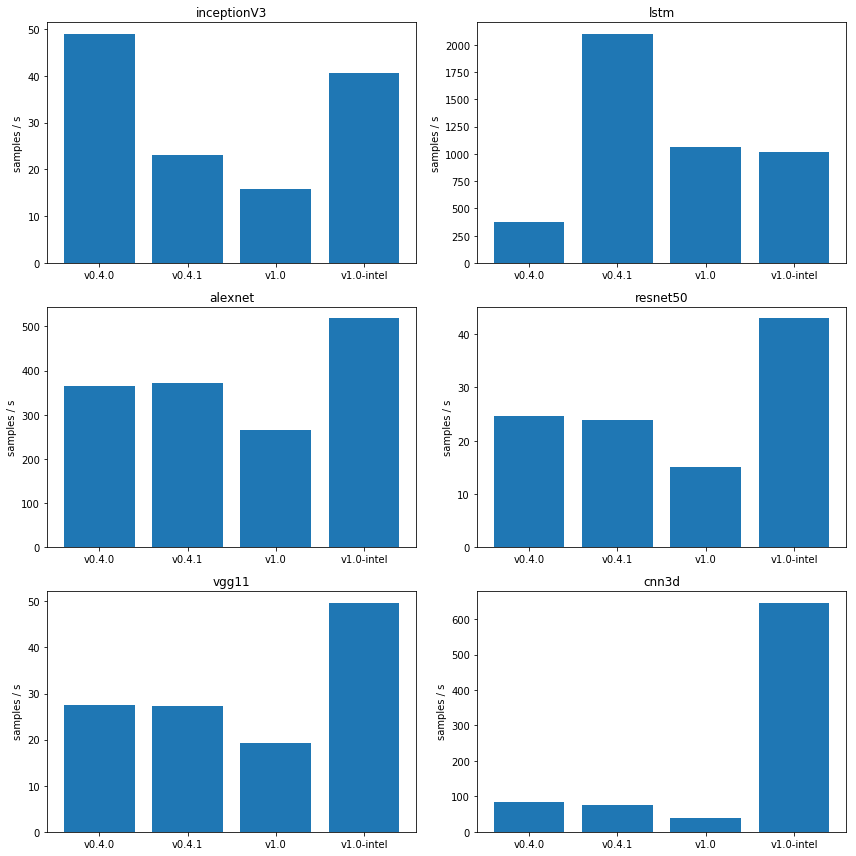

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model]
    ax.bar(model_results.version, model_results.valid_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()